In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Eισαγάγουμε τα δεδομένα

In [2]:
%run data_loading.ipynb

In [3]:
%run MyClass.ipynb

In [4]:
%run Corr_data.ipynb
totaldf

,Pb,μob,P,μ,μ1,μ2,μ3,μ4,μ5,μ6,μ7,μ8,μ9
0,8.448693,2.373815,8.448693,2.373815,2.373815,2.373815,2.373815,2.373815,2.373815,2.375738,2.373815,2.373815,2.373815
1,8.448693,2.373815,9.823879,2.403243,2.405203,2.423084,2.419623,2.419706,2.434698,2.402473,2.406663,2.414571,2.441977
2,8.448693,2.373815,11.199064,2.448862,2.436591,2.473376,2.473134,2.466484,2.495580,2.429208,2.439964,2.456026,2.510139
3,8.448693,2.373815,12.574250,2.497785,2.467978,2.524711,2.533689,2.514167,2.556462,2.455943,2.473727,2.498193,2.578301
4,8.448693,2.373815,13.949436,2.547933,2.499366,2.577112,2.600787,2.562771,2.617344,2.482678,2.507956,2.541085,2.646463
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,31.442482,0.578432,50.246970,0.628829,0.681971,0.734183,0.737963,0.751558,0.744775,0.620398,0.698013,0.682770,0.761644
16,31.442482,0.578432,51.500602,0.633035,0.688873,0.745946,0.749969,0.764792,0.755865,0.623164,0.706812,0.690360,0.773858
17,31.442482,0.578432,52.754235,0.637304,0.695776,0.757898,0.762071,0.778259,0.766954,0.625930,0.715723,0.698035,0.786073
18,31.442482,0.578432,54.007867,0.641632,0.702678,0.770042,0.774255,0.791963,0.778044,0.628697,0.724745,0.705795,0.798287


#### Τέλος βγάζουμε κάποια βασικά statistics για τα οποία δεν είμαι βέβαιος ότι τα έβαλα σωστά. Γενικά προσπάθησα να κάνω ότι και στο paper αλλά τα αποτελέσματα δεν είναι πάντα παρόμοια, προφανώς αφού έχουμε διαφορετικό dataset.

In [5]:
def Stats_matrix(a):
    average_error = []
    standard_deviation = []
    absolute_average_error = []
    absolute_standard_deviation =[]
    for i in range(9):
        average_error.append(np.average((a.iloc[:,i+4]-a.μ)/a.μ*100))
        standard_deviation.append(np.std((a.iloc[:,i+4]-a.μ)/a.μ*100))
        absolute_average_error.append(np.average(np.absolute((a.iloc[:,i+4]-a.μ)/a.μ*100)))
        absolute_standard_deviation.append(np.std(np.absolute((a.iloc[:,i+4]-a.μ)/totaldf.μ*100)))
    statistics  = pd.DataFrame(list(zip(average_error,standard_deviation,absolute_average_error,
                                        absolute_standard_deviation)),columns = ['% AE','% Std Dev AE','%AAE','% Std Dev AAE'],index = ['Beal(1946)','Kouzel(1965)','Vazquez and Beggs(1976)','Khan(1987)','Petrosky(1990)','Kartoatmodjo and Schmidt(1991)','Orbey and Sandler(1993)','Kouzel Modified(1997)','Hossain(2005)'])
    return statistics

Stats_matrix(totaldf)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Beal(1946),-0.996822,10.477103,4.133873,9.678555
Kouzel(1965),1.569330,7.750872,4.831714,6.260459
Vazquez and Beggs(1976),8.117628,17.601816,10.499855,16.293337
Khan(1987),0.808191,9.512199,5.701674,7.656763
Petrosky(1990),-0.004798,23.715172,9.073829,21.910615
Kartoatmodjo and Schmidt(1991),-5.476974,8.107699,6.606048,7.217490
Orbey and Sandler(1993),-3.370956,8.690727,5.165609,7.759419
Kouzel Modified(1997),-1.826995,7.089246,4.390254,5.858412
Hossain(2005),3.861763,8.347622,6.294137,6.706701


#### Τώρα θα βγάλουμε τα ίδια statistics αλλά μόνο για τα σημεία με Pb>50 psi

In [6]:
over_fifty = totaldf.loc[totaldf.Pb>50/145.038]
over_fifty

,Pb,μob,P,μ,μ1,μ2,μ3,μ4,μ5,μ6,μ7,μ8,μ9
0,8.448693,2.373815,8.448693,2.373815,2.373815,2.373815,2.373815,2.373815,2.373815,2.375738,2.373815,2.373815,2.373815
1,8.448693,2.373815,9.823879,2.403243,2.405203,2.423084,2.419623,2.419706,2.434698,2.402473,2.406663,2.414571,2.441977
2,8.448693,2.373815,11.199064,2.448862,2.436591,2.473376,2.473134,2.466484,2.495580,2.429208,2.439964,2.456026,2.510139
3,8.448693,2.373815,12.574250,2.497785,2.467978,2.524711,2.533689,2.514167,2.556462,2.455943,2.473727,2.498193,2.578301
4,8.448693,2.373815,13.949436,2.547933,2.499366,2.577112,2.600787,2.562771,2.617344,2.482678,2.507956,2.541085,2.646463
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,31.442482,0.578432,50.246970,0.628829,0.681971,0.734183,0.737963,0.751558,0.744775,0.620398,0.698013,0.682770,0.761644
16,31.442482,0.578432,51.500602,0.633035,0.688873,0.745946,0.749969,0.764792,0.755865,0.623164,0.706812,0.690360,0.773858
17,31.442482,0.578432,52.754235,0.637304,0.695776,0.757898,0.762071,0.778259,0.766954,0.625930,0.715723,0.698035,0.786073
18,31.442482,0.578432,54.007867,0.641632,0.702678,0.770042,0.774255,0.791963,0.778044,0.628697,0.724745,0.705795,0.798287


In [7]:
Stats_matrix(over_fifty)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Beal(1946),-0.957929,10.512094,4.125507,35798.784010
Kouzel(1965),1.614923,7.766143,4.851300,6915.210908
Vazquez and Beggs(1976),8.023457,17.570418,10.424694,5642.860941
Khan(1987),0.868571,9.527627,5.708151,8650.533935
Petrosky(1990),0.075085,23.803578,9.086445,10994.809838
Kartoatmodjo and Schmidt(1991),-5.484429,8.132598,6.621177,4967.282954
Orbey and Sandler(1993),-3.329293,8.705671,5.142383,9347.787521
Kouzel Modified(1997),-1.805200,7.109556,4.394783,6551.228383
Hossain(2005),3.901833,8.370624,6.332001,6572.984526


#### Και τώρα για Pb<50 psi

In [8]:
under_fifty = totaldf.loc[totaldf.Pb<50/145.038]
under_fifty 

,Pb,μob,P,μ,μ1,μ2,μ3,μ4,μ5,μ6,μ7,μ8,μ9
0,0.325407,2.644994,0.325407,2.644994,2.644994,2.644994,2.644994,2.644994,2.644994,2.647137,2.644994,2.644994,2.644994
1,0.325407,2.644994,1.039485,2.682523,2.663564,2.673765,2.675518,2.671423,2.677982,2.663517,2.663936,2.669073,2.685062
2,0.325407,2.644994,1.753564,2.718178,2.682134,2.702848,2.727369,2.698117,2.710969,2.679898,2.683014,2.693371,2.725130
3,0.325407,2.644994,2.467643,2.753561,2.700704,2.732248,2.794048,2.725077,2.743957,2.696279,2.702228,2.717890,2.765198
4,0.325407,2.644994,3.181721,2.788853,2.719274,2.761968,2.872905,2.752306,2.776945,2.712660,2.721579,2.742632,2.805266
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.293360,11.143696,11.029839,13.634206,13.141275,13.617703,18.729008,12.940538,11.213895,13.325896,12.405809,13.443796,14.257174
16,0.293360,11.143696,11.745604,13.836512,13.274447,13.800945,19.584183,13.070149,11.218575,13.470775,12.494863,13.613028,14.464739
17,0.293360,11.143696,12.461369,14.044598,13.407618,13.986653,20.485780,13.201059,11.223255,13.615653,12.584555,13.784391,14.672304
18,0.293360,11.143696,13.177135,14.258749,13.540790,14.174860,21.435050,13.333279,11.227935,13.760531,12.674892,13.957911,14.879869


In [9]:
Stats_matrix(under_fifty)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Beal(1946),-4.782350,4.879111,4.948215,235.117004
Kouzel(1965),-2.868366,4.137136,2.925404,229.502143
Vazquez and Beggs(1976),17.283548,18.232807,17.815523,940.789653
Khan(1987),-5.068744,5.195880,5.071266,404.242234
Petrosky(1990),-7.780104,9.614791,7.845857,762.473475
Kartoatmodjo and Schmidt(1991),-4.751336,5.083761,5.133440,221.320638
Orbey and Sandler(1993),-7.426203,5.797501,7.426203,505.150021
Kouzel Modified(1997),-3.948305,4.200319,3.949428,240.747586
Hossain(2005),-0.038353,4.109252,2.608773,176.411247


#### Τώρα για 0<μob<1

In [10]:
visc_0_1 = totaldf.loc[(totaldf.μob<1) & (totaldf.μob>0)]
visc_0_1

,Pb,μob,P,μ,μ1,μ2,μ3,μ4,μ5,μ6,μ7,μ8,μ9
0,20.272010,0.538614,20.272010,0.538614,0.538614,0.538614,0.538614,0.538614,0.538614,0.539050,0.538614,0.538614,0.538614
1,20.272010,0.538614,21.019473,0.541676,0.542494,0.543706,0.543910,0.544249,0.544616,0.540527,0.542652,0.542113,0.545319
2,20.272010,0.538614,21.766936,0.545134,0.546374,0.548845,0.549410,0.549943,0.550618,0.542004,0.546721,0.545634,0.552025
3,20.272010,0.538614,22.514398,0.548914,0.550254,0.554034,0.555109,0.555696,0.556619,0.543481,0.550820,0.549178,0.558730
4,20.272010,0.538614,23.261861,0.552961,0.554134,0.559271,0.561000,0.561510,0.562621,0.544958,0.554950,0.552746,0.565435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,31.442482,0.578432,50.246970,0.628829,0.681971,0.734183,0.737963,0.751558,0.744775,0.620398,0.698013,0.682770,0.761644
16,31.442482,0.578432,51.500602,0.633035,0.688873,0.745946,0.749969,0.764792,0.755865,0.623164,0.706812,0.690360,0.773858
17,31.442482,0.578432,52.754235,0.637304,0.695776,0.757898,0.762071,0.778259,0.766954,0.625930,0.715723,0.698035,0.786073
18,31.442482,0.578432,54.007867,0.641632,0.702678,0.770042,0.774255,0.791963,0.778044,0.628697,0.724745,0.705795,0.798287


In [11]:
Stats_matrix(visc_0_1)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Beal(1946),-0.923943,5.065117,3.001110,6.104173
Kouzel(1965),1.455048,6.841564,4.233484,8.439962
Vazquez and Beggs(1976),6.179764,13.328986,8.110547,22.884575
Khan(1987),3.262646,7.700115,5.179247,10.104538
Petrosky(1990),5.354057,26.238925,6.722934,10.457806
Kartoatmodjo and Schmidt(1991),-7.225205,7.157441,7.274694,10.406040
Orbey and Sandler(1993),-0.795513,5.748657,3.309822,6.195618
Kouzel Modified(1997),-2.763842,6.082623,3.929505,6.333604
Hossain(2005),3.349809,7.210490,5.424730,9.990977


#### Τώρα για 1<μob<5

In [12]:
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
visc_1_5

,Pb,μob,P,μ,μ1,μ2,μ3,μ4,μ5,μ6,μ7,μ8,μ9
0,8.448693,2.373815,8.448693,2.373815,2.373815,2.373815,2.373815,2.373815,2.373815,2.375738,2.373815,2.373815,2.373815
1,8.448693,2.373815,9.823879,2.403243,2.405203,2.423084,2.419623,2.419706,2.434698,2.402473,2.406663,2.414571,2.441977
2,8.448693,2.373815,11.199064,2.448862,2.436591,2.473376,2.473134,2.466484,2.495580,2.429208,2.439964,2.456026,2.510139
3,8.448693,2.373815,12.574250,2.497785,2.467978,2.524711,2.533689,2.514167,2.556462,2.455943,2.473727,2.498193,2.578301
4,8.448693,2.373815,13.949436,2.547933,2.499366,2.577112,2.600787,2.562771,2.617344,2.482678,2.507956,2.541085,2.646463
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,15.990759,2.205136,30.664265,2.759119,2.512083,2.739877,2.811488,2.704989,2.829619,2.461737,2.553393,2.636255,2.873458
16,15.990759,2.205136,31.642499,2.798035,2.532546,2.779825,2.862672,2.742084,2.871251,2.478725,2.578476,2.667826,2.918013
17,15.990759,2.205136,32.620733,2.837073,2.553009,2.820356,2.914947,2.779689,2.912883,2.495713,2.603806,2.699776,2.962567
18,15.990759,2.205136,33.598966,2.876223,2.573472,2.861477,2.968274,2.817809,2.954515,2.512701,2.629385,2.732108,3.007122


In [13]:
Stats_matrix(visc_1_5)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Beal(1946),-3.688661,5.603427,4.384910,74.544292
Kouzel(1965),2.656879,6.808664,4.531145,68.615776
Vazquez and Beggs(1976),12.608627,20.490079,13.415717,196.856816
Khan(1987),1.594984,6.345977,4.073291,64.555599
Petrosky(1990),2.717361,8.085762,5.714935,77.941002
Kartoatmodjo and Schmidt(1991),-5.186512,6.068548,5.541646,76.566510
Orbey and Sandler(1993),-2.733941,5.566889,3.945073,73.314922
Kouzel Modified(1997),-0.321422,5.880189,3.781007,63.202401
Hossain(2005),6.110440,7.610572,6.923986,81.556664


#### Τώρα για 5<μob<100

In [14]:
visc_5_100 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<100)]
visc_5_100

,Pb,μob,P,μ,μ1,μ2,μ3,μ4,μ5,μ6,μ7,μ8,μ9
0,10.985709,6.762278,10.985709,6.762278,6.762278,6.762278,6.762278,6.762278,6.762278,6.767755,6.762278,6.762278,6.762278
1,10.985709,6.762278,12.227368,7.075487,6.874248,6.909005,6.878602,6.880204,6.792579,6.886382,6.846707,6.895155,6.966084
2,10.985709,6.762278,13.469026,7.361762,6.986218,7.058915,7.008928,7.000185,6.822880,7.005008,6.932191,7.030643,7.169890
3,10.985709,6.762278,14.710685,7.628114,7.098188,7.212078,7.152309,7.122260,6.853181,7.123634,7.018742,7.168793,7.373697
4,10.985709,6.762278,15.952343,7.879314,7.210158,7.368565,7.307967,7.246463,6.883483,7.242260,7.106373,7.309658,7.577503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,8.634834,17.966830,29.115649,26.031134,25.783442,27.169413,27.761806,23.895614,17.983418,26.420991,22.047395,26.711617,28.189255
16,8.634834,17.966830,30.481037,26.590825,26.304549,27.928922,28.700298,24.354243,17.984524,26.983631,22.350282,27.427240,28.870750
17,8.634834,17.966830,31.846425,27.151351,26.825657,28.709663,29.667660,24.821675,17.985630,27.546272,22.657330,28.162034,29.552245
18,8.634834,17.966830,33.211812,27.712613,27.346764,29.512230,30.662738,25.298079,17.986735,28.108912,22.968596,28.916514,30.233740


In [15]:
Stats_matrix(visc_5_100)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Beal(1946),-1.781554,6.345650,3.979391,580.997922
Kouzel(1965),1.022533,7.939676,5.740417,1023.009100
Vazquez and Beggs(1976),10.453518,22.822411,14.066741,2673.536128
Khan(1987),-6.122887,9.121499,7.542479,2312.128595
Petrosky(1990),-19.202528,13.489569,19.202528,3685.403834
Kartoatmodjo and Schmidt(1991),-0.985337,6.276344,4.084678,576.271137
Orbey and Sandler(1993),-10.590857,9.738899,10.811789,2729.785876
Kouzel Modified(1997),-0.340854,7.235655,5.220131,1026.223201
Hossain(2005),4.016559,8.648707,7.051965,1033.186138


#### Τώρα για 100<μob

In [16]:
visc_100_plus = totaldf.loc[(totaldf.μob>100)]
visc_100_plus

,Pb,μob,P,μ,μ1,μ2,μ3,μ4,μ5,μ6,μ7,μ8,μ9
0,14.753351,202.607489,14.753351,202.607489,202.607489,202.607489,202.607489,202.607489,202.607489,202.771601,202.607489,202.607489,202.607489
1,14.753351,202.607489,16.517033,208.039334,232.911330,214.344297,207.592099,207.644490,202.607489,224.887393,206.210034,214.331542,216.219721
2,14.753351,202.607489,18.280714,213.754736,263.215171,226.761005,213.179505,212.806715,202.607489,247.003185,209.876636,226.734019,229.831954
3,14.753351,202.607489,20.044396,219.772876,293.519012,239.896998,219.323089,218.097279,202.607489,269.118978,213.608433,239.854175,243.444187
4,14.753351,202.607489,21.808077,226.114709,323.822853,253.793943,225.984145,223.519370,202.607489,291.234770,217.406585,253.733540,257.056420
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,4.064062,175.896510,28.153381,374.616257,506.339502,371.228181,345.188623,245.993969,175.896510,427.139477,223.771005,371.204213,334.463264
16,4.064062,175.896510,29.759336,389.007001,528.369035,390.181360,363.321182,251.556537,175.896510,443.879510,227.391164,390.154489,345.034381
17,4.064062,175.896510,31.365291,403.500501,550.398568,410.102201,382.207075,257.244890,175.896510,460.619543,231.069890,410.072192,355.605498
18,4.064062,175.896510,32.971245,418.091750,572.428101,431.040106,401.822913,263.061872,175.896510,477.359575,234.808130,431.006710,366.176615


In [17]:
Stats_matrix(visc_100_plus)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Beal(1946),34.163987,51.539965,35.084593,243054.339576
Kouzel(1965),-3.495282,23.163861,18.519839,43921.821237
Vazquez and Beggs(1976),-6.131188,24.966712,17.972815,35265.094452
Khan(1987),-25.359768,19.745405,25.360821,54402.860619
Petrosky(1990),-37.267729,21.779761,37.267729,67339.770187
Kartoatmodjo and Schmidt(1991),6.755679,25.057753,19.196693,30658.215988
Orbey and Sandler(1993),-29.054100,20.175597,29.054100,58218.555309
Kouzel Modified(1997),-3.771695,22.923389,18.300728,41442.617782
Hossain(2005),-8.623737,21.311325,18.193143,41796.495038


#### Τώρα θα πλοτάρω το Barus viscosity relationship και το effect του μob στην Barus viscosity relationship

<Figure size 864x576 with 0 Axes>

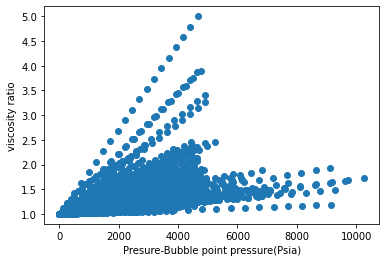

<Figure size 864x576 with 0 Axes>

In [23]:
plt.scatter((totaldf.P-totaldf.Pb)*145.038,totaldf.μ/totaldf.μob, alpha =1)
plt.xlabel('Presure-Bubble point pressure(Psia)')
plt.ylabel('viscosity ratio')


Text(0, 0.5, 'viscosity ratio')

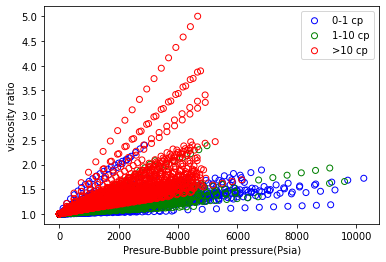

In [19]:
part1 = totaldf.loc[totaldf.μ<1]
part2 = totaldf.loc[(totaldf.μ<10) & (totaldf.μ>1)]
part3 = totaldf.loc[(totaldf.μ>10)]

plt.scatter((part1.P-part1.Pb)*145.038,part1.μ/part1.μob, facecolors='none', edgecolors='b',label='0-1 cp')
plt.scatter((part2.P-part2.Pb)*145.038,part2.μ/part2.μob, facecolors='none',edgecolors='g',label = '1-10 cp')
plt.scatter((part3.P-part3.Pb)*145.038,part3.μ/part3.μob, facecolors='none',edgecolors='r',label='>10 cp')
plt.legend()

plt.xlabel('Presure-Bubble point pressure(Psia)')
plt.ylabel('viscosity ratio')

#### Εδώ πλοτάρω ιξώδες ως προς διαφορά πίεσης, απλά έχω μεγενθύνει τον άξονα στα υπόλοιπα 3 διαγράμματα λόγω πυκνότητας σημείων. 

(50.0, 500.0)

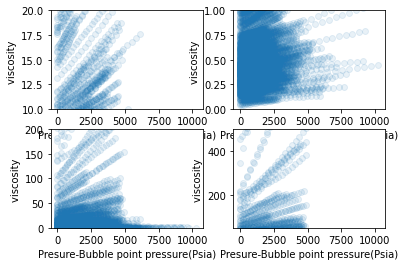

In [31]:
plt.subplot(2,2,1)
plt.scatter((totaldf.P-totaldf.Pb)*145.038,totaldf.μ, alpha =0.1)
plt.xlabel('Presure-Bubble point pressure(Psia)')
plt.ylabel('viscosity ')
plt.ylim(10,20)

plt.subplot(2,2,2)
plt.scatter((totaldf.P-totaldf.Pb)*145.038,totaldf.μ, alpha =0.1)
plt.xlabel('Presure-Bubble point pressure(Psia)')
plt.ylabel('viscosity ')
plt.ylim(0,1)

plt.subplot(2,2,3)
plt.scatter((totaldf.P-totaldf.Pb)*145.038,totaldf.μ, alpha =0.1)
plt.xlabel('Presure-Bubble point pressure(Psia)')
plt.ylabel('viscosity ')
plt.ylim(0,200)

plt.subplot(2,2,4)
plt.scatter((totaldf.P-totaldf.Pb)*145.038,totaldf.μ, alpha =0.1)
plt.xlabel('Presure-Bubble point pressure(Psia)')
plt.ylabel('viscosity ')
plt.ylim(50,500)  

#### Εδώ φτιάχνω μια συνάρτηση που πλοτάρει το μέσο σφάλμα ως προς διαφορά πίεσης για το correlation που επιλέγω και ενδεικτικά έχω προσθέσει 2 παραδείγματα.

In [134]:
def UndersatErrorPlot(a):
    corrs =  ['Beal(1946)','Kouzel(1965)','Vazquez and Beggs(1976)','Khan(1987)','Petrosky(1990)','Kartoatmodjo and Schmidt(1991)','Orbey and Sandler(1993)','Kouzel Modified(1997)','Hossain(2005)']
    b = corrs.index(a)
    plt.scatter((totaldf.P-totaldf.Pb)*145.038,(totaldf.iloc[:,b+4]-totaldf.μ)/totaldf.μ*100,facecolors='none', edgecolors='b')
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Presure-Bubble point pressure(Psia)')
    plt.ylabel('% Error')

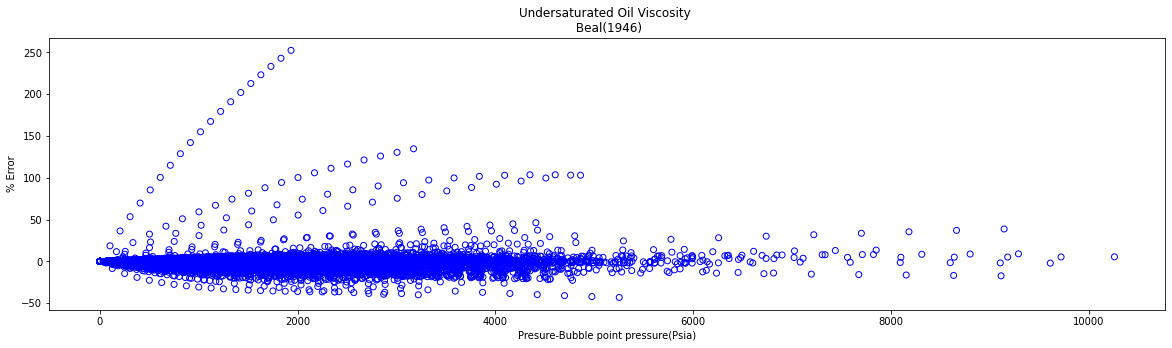

In [135]:
UndersatErrorPlot('Beal(1946)')

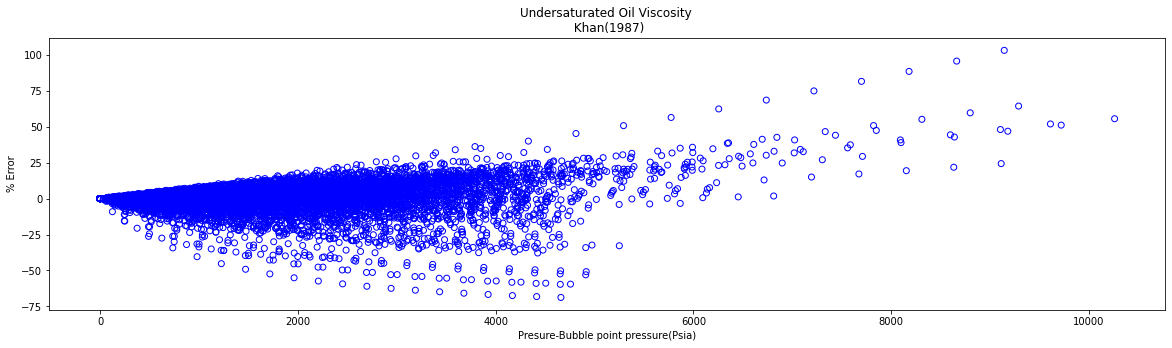

In [136]:
UndersatErrorPlot('Khan(1987)')

#### Εδώ φτιάχνω συνάρτηση που να πλοτάρει το μετρούμενο ιξώδες με το υπολογισμένο από τις συσχετίσεις με δυο ενδεικτικά παραδείγματα πάλι

In [151]:
def UndersatViscPlot(a):
    corrs =  ['Beal(1946)','Kouzel(1965)','Vazquez and Beggs(1976)','Khan(1987)','Petrosky(1990)','Kartoatmodjo and Schmidt(1991)','Orbey and Sandler(1993)','Kouzel Modified(1997)','Hossain(2005)']
    b = corrs.index(a)
    plt.scatter(totaldf.μ,totaldf.iloc[:,b+4],facecolors ='none', edgecolors='b')
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Measured Viscosity(cp)')
    plt.ylabel('Calculated Viscosity(cp)')

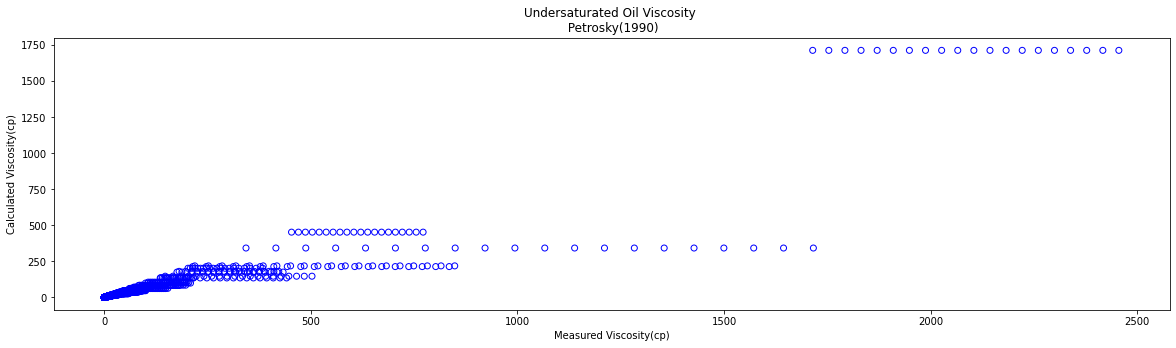

In [152]:
UndersatViscPlot('Petrosky(1990)')

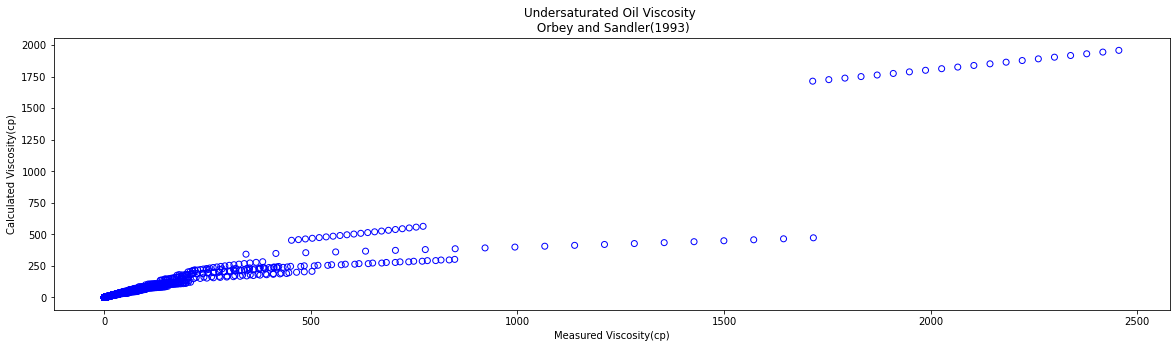

In [153]:
UndersatViscPlot('Orbey and Sandler(1993)')

#### Τέλος θα φτιάξουμε τα bar plots με τα απόλυτα μέσα σφάλματα για τις υποπεριπτώσεις που είδαμε πριν στους πίνακες σφαλμάτων. 

In [7]:
press_0_25 = over_fifty.loc[((over_fifty.P-over_fifty.Pb)<2500/145.038)]
press_25_50 = over_fifty.loc[((over_fifty.P-over_fifty.Pb)<5000/145.038)&((over_fifty.P-over_fifty.Pb)>2500/145.038)]
press_50_100 = over_fifty.loc[((over_fifty.P-over_fifty.Pb)<10000/145.038)&((over_fifty.P-over_fifty.Pb)>5000/145.038)]
visc_0_1 = over_fifty.loc[(over_fifty.μob>0) & (over_fifty.μob<1)]
visc_1_5 = over_fifty.loc[(over_fifty.μob>1) & (over_fifty.μob<5)]
visc_5_100 = over_fifty.loc[(over_fifty.μob>5) & (over_fifty.μob<100)]
visc_100_plus = over_fifty.loc[(over_fifty.μob>100)]
full_data = {
    'Pdif 0-2500' : Stats_matrix(press_0_25).iloc[:,2],
    'Pdif 2500-5000' : Stats_matrix(press_25_50).iloc[:,2],
    'Pdif 5000-10000' : Stats_matrix(press_50_100).iloc[:,2],
    'BP V 0-1' : Stats_matrix(visc_0_1).iloc[:,2],
    'BP V 1-5' : Stats_matrix(visc_1_5).iloc[:,2],
    'BP V 5-100' : Stats_matrix(visc_5_100).iloc[:,2],
    'BP V 100+' : Stats_matrix(visc_100_plus).iloc[:,2],
    



}

corrs =  ['Beal(1946)','Kouzel(1965)','Vazquez and Beggs(1976)','Khan(1987)','Petrosky(1990)','K&S(1991)','O&S(1993)','Kouzel Modified(1997)','Hossain(2005)']
%run my_bar_plot.ipynb

fig, ax = plt.subplots()
bar_plot(ax, full_data, total_width=.8, single_width=.9)
plt.xticks(range(9), corrs)
plt.title('Undersaturated Oil Viscosity \n Pb>50')
plt.ylabel("% Average Absolute Error")




NameError: name 'over_fifty' is not defined

Text(0, 0.5, '% Average Absolute Error')

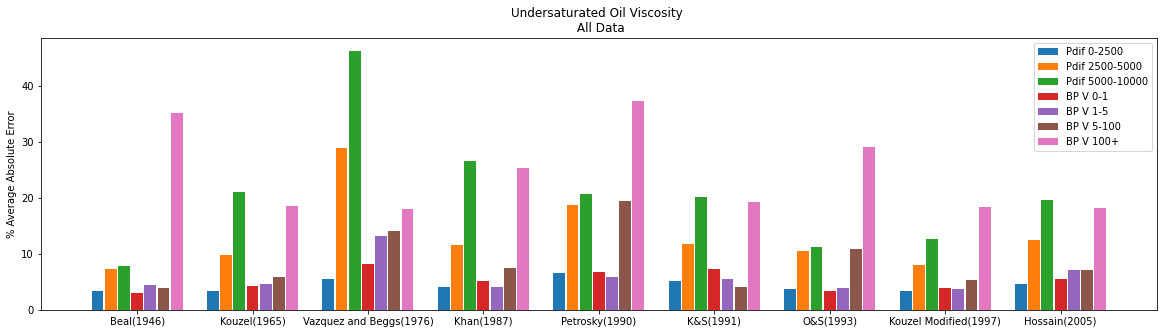

In [187]:
press_0_25 = totaldf.loc[((totaldf.P-totaldf.Pb)<2500/145.038)]
press_25_50 = totaldf.loc[((totaldf.P-totaldf.Pb)<5000/145.038)&((totaldf.P-totaldf.Pb)>2500/145.038)]
press_50_100 = totaldf.loc[((totaldf.P-totaldf.Pb)<10000/145.038)&((totaldf.P-totaldf.Pb)>5000/145.038)]
visc_0_1 = totaldf.loc[(totaldf.μob>0) & (totaldf.μob<1)]
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
visc_5_100 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<100)]
visc_100_plus = totaldf.loc[(totaldf.μob>100)]

fig, ax = plt.subplots()
bar_plot(ax, full_data, total_width=.8, single_width=.9)
plt.xticks(range(9), corrs)
plt.title('Undersaturated Oil Viscosity \n All Data')
plt.ylabel("% Average Absolute Error")